In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [34]:
df_full = pd.read_csv('craigslistVehiclesFull.csv')
df = df_full.sample(3000)

In [35]:
df.head()

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,paint_color,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
1600606,https://watertown.craigslist.org/ctd/d/2013-ra...,watertown,21395,2013.0,ram,1500 4wd,NaN,NaN,gas,71963.0,...,black,https://images.craigslist.org/00P0P_8O0j6RG22r...,43.159000,-75.970000,36053.0,Madison,36.0,NY,New York,53.0
375612,https://newhaven.craigslist.org/cto/d/ford-fx4...,newhaven,4500,2005.0,ford,f150 lariat,excellent,8 cylinders,gas,155000.0,...,black,https://images.craigslist.org/00z0z_8rX4k0dpVB...,41.060200,-73.544500,9001.0,Fairfield,9.0,CT,Connecticut,51.0
133399,https://washingtondc.craigslist.org/mld/cto/d/...,washingtondc,3800,2006.0,NaN,cadilac cts,excellent,6 cylinders,gas,118000.0,...,black,https://images.craigslist.org/00Q0Q_dLhDS0PAiI...,39.180037,-77.209897,24031.0,Montgomery,24.0,MD,Maryland,56.0
1166920,https://cfl.craigslist.org/ctd/d/2006-honda-pi...,cfl,4799,2006.0,honda,pilot,excellent,6 cylinders,gas,160000.0,...,red,https://images.craigslist.org/01212_2LdvBUzyVN...,27.492400,-81.435700,12055.0,Highlands,12.0,FL,Florida,65.0
700664,https://sacramento.craigslist.org/ctd/d/2015-f...,sacramento,8500,2015.0,ford,c-max hybrid se,excellent,4 cylinders,gas,94318.0,...,black,https://images.craigslist.org/00O0O_bCUS9pA9Pl...,38.610760,-121.424376,6067.0,Sacramento,6.0,CA,California,59.0


In [36]:
df['type'].tail()

1440802      NaN
871756       NaN
585412     wagon
858218       SUV
1165783      NaN
Name: type, dtype: object

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1600606 to 1165783
Data columns (total 26 columns):
url             3000 non-null object
city            3000 non-null object
price           3000 non-null int64
year            2992 non-null float64
manufacturer    2774 non-null object
make            2878 non-null object
condition       1822 non-null object
cylinders       1851 non-null object
fuel            2986 non-null object
odometer        2056 non-null float64
title_status    2995 non-null object
transmission    2987 non-null object
vin             1087 non-null object
drive           1896 non-null object
size            1101 non-null object
type            1817 non-null object
paint_color     1846 non-null object
image_url       3000 non-null object
lat             3000 non-null float64
long            3000 non-null float64
county_fips     2899 non-null float64
county_name     2899 non-null object
state_fips      2899 non-null float64
state_code      2899 non-nul

In [38]:
df.drop(columns=['county_fips', 
                 'url', 
                 'image_url', 
                 'county_name', 
                 'state_fips', 
                 'state_code', 
                 'weather'], inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1600606 to 1165783
Data columns (total 19 columns):
city            3000 non-null object
price           3000 non-null int64
year            2992 non-null float64
manufacturer    2774 non-null object
make            2878 non-null object
condition       1822 non-null object
cylinders       1851 non-null object
fuel            2986 non-null object
odometer        2056 non-null float64
title_status    2995 non-null object
transmission    2987 non-null object
vin             1087 non-null object
drive           1896 non-null object
size            1101 non-null object
type            1817 non-null object
paint_color     1846 non-null object
lat             3000 non-null float64
long            3000 non-null float64
state_name      3000 non-null object
dtypes: float64(4), int64(1), object(14)
memory usage: 468.8+ KB


In [40]:
cols = df.columns.tolist()
cols.remove('state_name')
cols.insert(1, 'state_name')

df=df[cols]
df.rename(columns={'state_name':'state'}, inplace=True)
df.head()

,city,state,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,lat,long
1600606,watertown,New York,21395,2013.0,ram,1500 4wd,NaN,NaN,gas,71963.0,clean,automatic,1C6RR7FTXDS537130,NaN,NaN,NaN,black,43.159000,-75.970000
375612,newhaven,Connecticut,4500,2005.0,ford,f150 lariat,excellent,8 cylinders,gas,155000.0,clean,automatic,NaN,4wd,full-size,truck,black,41.060200,-73.544500
133399,washingtondc,Maryland,3800,2006.0,NaN,cadilac cts,excellent,6 cylinders,gas,118000.0,clean,automatic,1g6dp577560121762,rwd,full-size,sedan,black,39.180037,-77.209897
1166920,cfl,Florida,4799,2006.0,honda,pilot,excellent,6 cylinders,gas,160000.0,clean,automatic,5FNYF28586B042598,fwd,NaN,SUV,red,27.492400,-81.435700
700664,sacramento,California,8500,2015.0,ford,c-max hybrid se,excellent,4 cylinders,gas,94318.0,clean,automatic,1FADP5AU9FL125068,fwd,NaN,sedan,black,38.610760,-121.424376


In [41]:
# Could probably handle all these in one swell foop, but I couldn't figure it out
df2 = df[df['lat'] > 20]
df = df2[df2['lat'] < 50]
df2 = df[df['long'] > -125]
df = df2[df2['long'] < -65]
df.head()

,city,state,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,lat,long
1600606,watertown,New York,21395,2013.0,ram,1500 4wd,NaN,NaN,gas,71963.0,clean,automatic,1C6RR7FTXDS537130,NaN,NaN,NaN,black,43.159000,-75.970000
375612,newhaven,Connecticut,4500,2005.0,ford,f150 lariat,excellent,8 cylinders,gas,155000.0,clean,automatic,NaN,4wd,full-size,truck,black,41.060200,-73.544500
133399,washingtondc,Maryland,3800,2006.0,NaN,cadilac cts,excellent,6 cylinders,gas,118000.0,clean,automatic,1g6dp577560121762,rwd,full-size,sedan,black,39.180037,-77.209897
1166920,cfl,Florida,4799,2006.0,honda,pilot,excellent,6 cylinders,gas,160000.0,clean,automatic,5FNYF28586B042598,fwd,NaN,SUV,red,27.492400,-81.435700
700664,sacramento,California,8500,2015.0,ford,c-max hybrid se,excellent,4 cylinders,gas,94318.0,clean,automatic,1FADP5AU9FL125068,fwd,NaN,sedan,black,38.610760,-121.424376


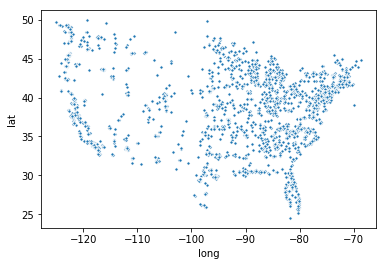

In [42]:
import seaborn as sns
sns.scatterplot(df["long"], df["lat"], s=10)

In [43]:
df2.to_csv('craigslist_cars_sample.csv', index=False)